<a href="https://colab.research.google.com/github/Ahmad162539/Smartbuilding/blob/main/Plot_Prediction_results_using_proposed_hybrid_RF_LSTM_based_CEEMDAN_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## import libraries

In [2]:
pip install EMD-signal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0


In [3]:
from PyEMD import CEEMDAN

In [5]:
pip install dataframe_image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.7/399.7 kB 27.1 MB/s eta 0:00:00


In [6]:
import dataframe_image as dfi

In [7]:
import matplotlib.pyplot as plt
import math
import time
import tensorflow as tf
import numpy
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn import metrics

In [8]:
max_features=8 # the feature number of each node is set to 8, as it is suggested to be one-third of the feature's number (Lahouar and Slama,2017)
lr=0.001 #learning rate LSTM as recommended in (Kingma and Ba, 2014)
optimizer='Adam' #Adam is used as the optimizer for LSTM as it is computationally efficient (Dubey, Ashutosh Kumar, et al,2021)
neuron=64
epoch=100 #(Jorges et al, 2021)
batch_size=64 #(Kandel et al,2020)
hours=24 #in this study, to predict one hour ahead predicton, we use input from the previous 24 hour energy consumption
data_partition=0.8 #in this study, we divided the data into 80% of data as training data and 20% of the data as testing data

In [9]:
import numpy
import pandas as pd
import tensorflow as tf
from PyEMD import CEEMDAN
import warnings
warnings.filterwarnings("ignore")


### import the libraries
from tensorflow import keras
from tensorflow.keras import layers

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from math import sqrt

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

def percentage_error(actual, predicted):
    res = numpy.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred):
    return numpy.mean(numpy.abs(percentage_error(numpy.asarray(y_true), numpy.asarray(y_pred)))) * 100



# In[25]:


def lr_model(datass,look_back,data_partition):

    datasets=datass.values
    train_size = int(len(datasets) * data_partition)
    test_size = len(datasets) - train_size
    train, test = datasets[0:train_size], datasets[train_size:len(datasets)]

    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    X_train=pd.DataFrame(trainX)
    Y_train=pd.DataFrame(trainY)
    X_test=pd.DataFrame(testX)
    Y_test=pd.DataFrame(testY)
    sc_X = StandardScaler()
    sc_y = StandardScaler()

    X= sc_X.fit_transform(X_train)
    y= sc_y.fit_transform(Y_train)
    X1= sc_X.fit_transform(X_test)
    y1= sc_y.fit_transform(Y_test)
    y=y.ravel()
    y1=y1.ravel()
    import tensorflow as tf

    numpy.random.seed(1234)
    tf.random.set_seed(1234)

    from sklearn.linear_model import LinearRegression

    grid = LinearRegression()

    grid.fit(X,y)
    y_pred_train_lr= grid.predict(X)
    y_pred_test_lr= grid.predict(X1)

    y_pred_train_lr=pd.DataFrame(y_pred_train_lr)
    y_pred_test_lr=pd.DataFrame(y_pred_test_lr)

    y1=pd.DataFrame(y1)
    y=pd.DataFrame(y)


    y_pred_test1_lr= sc_y.inverse_transform (y_pred_test_lr)
    y_pred_train1_lr=sc_y.inverse_transform (y_pred_train_lr)

    y_test= sc_y.inverse_transform (y1)
    y_train= sc_y.inverse_transform (y)

    y_pred_test1_rf=pd.DataFrame(y_pred_test1_lr)
    y_pred_train1_rf=pd.DataFrame(y_pred_train1_lr)

    y_test= pd.DataFrame(y_test)


    #summarize the fit of the model
    mape=mean_absolute_percentage_error(y_test,y_pred_test1_lr)
    rmse= sqrt(mean_squared_error(y_test,y_pred_test1_lr))
    mae=metrics.mean_absolute_error(y_test,y_pred_test1_lr)


    return mape,rmse,mae


# In[26]:


def svr_model(datass,look_back,data_partition):

    datasets=datass.values
    train_size = int(len(datasets) * data_partition)
    test_size = len(datasets) - train_size
    train, test = datasets[0:train_size], datasets[train_size:len(datasets)]

    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    X_train=pd.DataFrame(trainX)
    Y_train=pd.DataFrame(trainY)
    X_test=pd.DataFrame(testX)
    Y_test=pd.DataFrame(testY)
    sc_X = StandardScaler()
    sc_y = StandardScaler()

    X= sc_X.fit_transform(X_train)
    y= sc_y.fit_transform(Y_train)
    X1= sc_X.fit_transform(X_test)
    y1= sc_y.fit_transform(Y_test)
    y=y.ravel()
    y1=y1.ravel()

    numpy.random.seed(1234)

    import tensorflow as tf
    tf.random.set_seed(1234)


    from sklearn.svm import SVR

    grid = SVR()
    grid.fit(X,y)
    y_pred_train_svr= grid.predict(X)
    y_pred_test_svr= grid.predict(X1)

    y_pred_train_svr=pd.DataFrame(y_pred_train_svr)
    y_pred_test_svr=pd.DataFrame(y_pred_test_svr)

    y1=pd.DataFrame(y1)
    y=pd.DataFrame(y)


    y_pred_test1_svr= sc_y.inverse_transform (y_pred_test_svr)
    y_pred_train1_svr=sc_y.inverse_transform (y_pred_train_svr)

    y_test= sc_y.inverse_transform (y1)
    y_train= sc_y.inverse_transform (y)

    y_pred_test1_svr=pd.DataFrame(y_pred_test1_svr)
    y_pred_train1_svr=pd.DataFrame(y_pred_train1_svr)

    y_test= pd.DataFrame(y_test)


    #summarize the fit of the model
    mape=mean_absolute_percentage_error(y_test,y_pred_test1_svr)
    rmse= sqrt(mean_squared_error(y_test,y_pred_test1_svr))
    mae=metrics.mean_absolute_error(y_test,y_pred_test1_svr)


    return mape,rmse,mae


# In[27]:



def ann_model(datass,look_back,data_partition):


    datasets=datass.values
    train_size = int(len(datasets) * data_partition)
    test_size = len(datasets) - train_size
    train, test = datasets[0:train_size], datasets[train_size:len(datasets)]
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    X_train=pd.DataFrame(trainX)
    Y_train=pd.DataFrame(trainY)
    X_test=pd.DataFrame(testX)
    Y_test=pd.DataFrame(testY)
    sc_X = StandardScaler()
    sc_y = StandardScaler()

    X= sc_X.fit_transform(X_train)
    y= sc_y.fit_transform(Y_train)
    X1= sc_X.fit_transform(X_test)
    y1= sc_y.fit_transform(Y_test)
    y=y.ravel()
    y1=y1.ravel()

    import numpy

    trainX = numpy.reshape(X, (X.shape[0], 1, X.shape[1]))
    testX = numpy.reshape(X1, (X1.shape[0], 1, X1.shape[1]))


    numpy.random.seed(1234)
    import tensorflow as tf
    tf.random.set_seed(1234)


    from sklearn.neural_network import MLPRegressor

    model= MLPRegressor(random_state=1,activation='tanh').fit(X,y)

    numpy.random.seed(1234)


    # make predictions
    y_pred_train = model.predict(X)
    y_pred_test = model.predict(X1)
    y_pred_test= numpy.array(y_pred_test).ravel()

    y_pred_test=pd.DataFrame(y_pred_test)
    y1=pd.DataFrame(y1)

    y_pred_test1= sc_y.inverse_transform (y_pred_test)
    y_test= sc_y.inverse_transform (y1)







    #summarize the fit of the model
    mape=mean_absolute_percentage_error(y_test,y_pred_test1)
    rmse= sqrt(mean_squared_error(y_test,y_pred_test1))
    mae=metrics.mean_absolute_error(y_test,y_pred_test1)


    return mape,rmse,mae


# In[28]:


def rf_model(datass,look_back,data_partition,max_features):

    datasets=datass.values
    train_size = int(len(datasets) * data_partition)
    test_size = len(datasets) - train_size
    train, test = datasets[0:train_size], datasets[train_size:len(datasets)]

    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    X_train=pd.DataFrame(trainX)
    Y_train=pd.DataFrame(trainY)
    X_test=pd.DataFrame(testX)
    Y_test=pd.DataFrame(testY)
    sc_X = StandardScaler()
    sc_y = StandardScaler()

    X= sc_X.fit_transform(X_train)
    y= sc_y.fit_transform(Y_train)
    X1= sc_X.fit_transform(X_test)
    y1= sc_y.fit_transform(Y_test)
    y=y.ravel()
    y1=y1.ravel()

    numpy.random.seed(1234)
    import tensorflow as tf
    tf.random.set_seed(1234)

    from sklearn.ensemble import RandomForestRegressor

    grid = RandomForestRegressor(max_features=max_features)
    grid.fit(X,y)
    y_pred_train_rf= grid.predict(X)
    y_pred_test_rf= grid.predict(X1)

    y_pred_train_rf=pd.DataFrame(y_pred_train_rf)
    y_pred_test_rf=pd.DataFrame(y_pred_test_rf)

    y1=pd.DataFrame(y1)
    y=pd.DataFrame(y)


    y_pred_test1_rf= sc_y.inverse_transform (y_pred_test_rf)
    y_pred_train1_rf=sc_y.inverse_transform (y_pred_train_rf)

    y_test= sc_y.inverse_transform (y1)
    y_train= sc_y.inverse_transform (y)

    y_pred_test1_rf=pd.DataFrame(y_pred_test1_rf)
    y_pred_train1_rf=pd.DataFrame(y_pred_train1_rf)

    y_test= pd.DataFrame(y_test)


    #summarize the fit of the model
    mape=mean_absolute_percentage_error(y_test,y_pred_test1_rf)
    rmse= sqrt(mean_squared_error(y_test,y_pred_test1_rf))
    mae=metrics.mean_absolute_error(y_test,y_pred_test1_rf)


    return mape,rmse,mae


# In[29]:


def lstm_model(datass,look_back,data_partition,max_features,epoch,batch_size,neuron,lr,optimizer):
    datasets=datass.values
    train_size = int(len(datasets) * data_partition)
    test_size = len(datasets) - train_size
    train, test = datasets[0:train_size], datasets[train_size:len(datasets)]
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    X_train=pd.DataFrame(trainX)
    Y_train=pd.DataFrame(trainY)
    X_test=pd.DataFrame(testX)
    Y_test=pd.DataFrame(testY)
    sc_X = StandardScaler()
    sc_y = StandardScaler()

    X= sc_X.fit_transform(X_train)
    y= sc_y.fit_transform(Y_train)
    X1= sc_X.fit_transform(X_test)
    y1= sc_y.fit_transform(Y_test)
    y=y.ravel()
    y1=y1.ravel()
    trainX1 = numpy.reshape(X, (X.shape[0],1,X.shape[1]))
    testX1 = numpy.reshape(X1, (X1.shape[0],1,X1.shape[1]))

    numpy.random.seed(1234)
    import tensorflow as tf
    tf.random.set_seed(1234)

    import os
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
    from keras.models import Sequential
    from keras.layers.core import Dense, Dropout, Activation
    from keras.layers import LSTM


    neuron=neuron
    model = Sequential()
    model.add(LSTM(units = neuron,input_shape=(trainX1.shape[1], trainX1.shape[2])))
    model.add(Dense(1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(loss='mse',optimizer=optimizer)
#    model.summary()


  # Fitting the RNN to the Training s
    model.fit(trainX1, y, epochs = epoch, batch_size = batch_size,verbose=0)
  # make predictions
    y_pred_train = model.predict(trainX1)
    y_pred_test = model.predict(testX1)
    y_pred_test= numpy.array(y_pred_test).ravel()

    y_pred_test=pd.DataFrame(y_pred_test)
    y_pred_test1= sc_y.inverse_transform (y_pred_test)
    y1=pd.DataFrame(y1)

    y_test= sc_y.inverse_transform (y1)

    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error

    from sklearn import metrics

    mape=mean_absolute_percentage_error(y_test,y_pred_test1)
    rmse= sqrt(mean_squared_error(y_test,y_pred_test1))
    mae=metrics.mean_absolute_error(y_test,y_pred_test1)
    return mape,rmse,mae


# In[30]:


###################################################hybrid based ceemdan####################################################
def hybrid_ceemdan_rf(datass,look_back,data_partition,max_features):


    import numpy as np
    import pandas as pd

    dfs=datass
    s = dfs.values

    emd = CEEMDAN(epsilon=0.05)
    emd.noise_seed(12345)

    IMFs = emd(s)


    full_imf=pd.DataFrame(IMFs)
    data_imf=full_imf.T

    import pandas as pd

    pred_test=[]
    test_ori=[]
    pred_train=[]
    train_ori=[]


    for col in data_imf:

        datasetss2=pd.DataFrame(data_imf[col])
        datasets=datasetss2.values
        train_size = int(len(datasets) * data_partition)
        test_size = len(datasets) - train_size
        train, test = datasets[0:train_size], datasets[train_size:len(datasets)]

        trainX, trainY = create_dataset(train, look_back)
        testX, testY = create_dataset(test, look_back)
        X_train=pd.DataFrame(trainX)
        Y_train=pd.DataFrame(trainY)
        X_test=pd.DataFrame(testX)
        Y_test=pd.DataFrame(testY)
        sc_X = StandardScaler()
        sc_y = StandardScaler()
        X= sc_X.fit_transform(X_train)
        y= sc_y.fit_transform(Y_train)
        X1= sc_X.fit_transform(X_test)
        y1= sc_y.fit_transform(Y_test)
        y=y.ravel()
        y1=y1.ravel()

        import numpy

        numpy.random.seed(1234)
        import tensorflow as tf
        tf.random.set_seed(1234)


        from sklearn.ensemble import RandomForestRegressor


        grid = RandomForestRegressor(max_features=max_features)
        grid.fit(X,y)
        y_pred_train= grid.predict(X)
        y_pred_test= grid.predict(X1)

        y_pred_test=pd.DataFrame(y_pred_test)
        y_pred_train=pd.DataFrame(y_pred_train)

        y1=pd.DataFrame(y1)
        y=pd.DataFrame(y)

        y_test= sc_y.inverse_transform (y1)
        y_train= sc_y.inverse_transform (y)

        y_pred_test1= sc_y.inverse_transform (y_pred_test)
        y_pred_train1= sc_y.inverse_transform (y_pred_train)


        pred_test.append(y_pred_test1)
        test_ori.append(y_test)
        pred_train.append(y_pred_train1)
        train_ori.append(y_train)


    result_pred_test= pd.DataFrame.from_records(pred_test)
    result_pred_train= pd.DataFrame.from_records(pred_train)


    a=result_pred_test.sum(axis = 0, skipna = True)
    b=result_pred_train.sum(axis = 0, skipna = True)


    dataframe=pd.DataFrame(dfs)
    dataset=dataframe.values

    train_size = int(len(dataset) * data_partition)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    X_train=pd.DataFrame(trainX)
    Y_train=pd.DataFrame(trainY)
    X_test=pd.DataFrame(testX)
    Y_test=pd.DataFrame(testY)

    sc_X = StandardScaler()
    sc_y = StandardScaler()
    X= sc_X.fit_transform(X_train)
    y= sc_y.fit_transform(Y_train)
    X1= sc_X.fit_transform(X_test)
    y1= sc_y.fit_transform(Y_test)
    y=y.ravel()
    y1=y1.ravel()


    trainX = numpy.reshape(X, (X.shape[0], 1, X.shape[1]))
    testX = numpy.reshape(X1, (X1.shape[0], 1, X1.shape[1]))

    numpy.random.seed(1234)
    import tensorflow as tf
    tf.random.set_seed(1234)

    y1=pd.DataFrame(y1)
    y=pd.DataFrame(y)
    y_test= sc_y.inverse_transform (y1)
    y_train= sc_y.inverse_transform (y)




    a= pd.DataFrame(a)
    y_test= pd.DataFrame(y_test)




   #summarize the fit of the model
    mape=mean_absolute_percentage_error(y_test,a)
    rmse= sqrt(mean_squared_error(y_test,a))
    mae=metrics.mean_absolute_error(y_test,a)



    return mape,rmse,mae


# In[31]:


def hybrid_ceemdan_lstm(datass,look_back,data_partition,max_features,epoch,batch_size,neuron,lr,optimizer):


    from PyEMD import CEEMDAN

    dfs=datass
    s = dfs.values

    emd = CEEMDAN(epsilon=0.05)
    emd.noise_seed(12345)

    IMFs = emd(s)


    full_imf=pd.DataFrame(IMFs)
    data_imf=full_imf.T

    pred_test=[]
    test_ori=[]
    pred_train=[]
    train_ori=[]


    for col in data_imf:

        datasetss2=pd.DataFrame(data_imf[col])
        datasets=datasetss2.values
        train_size = int(len(datasets) * data_partition)
        test_size = len(datasets) - train_size
        train, test = datasets[0:train_size], datasets[train_size:len(datasets)]

        trainX, trainY = create_dataset(train, look_back)
        testX, testY = create_dataset(test, look_back)
        X_train=pd.DataFrame(trainX)
        Y_train=pd.DataFrame(trainY)
        X_test=pd.DataFrame(testX)
        Y_test=pd.DataFrame(testY)
        sc_X = StandardScaler()
        sc_y = StandardScaler()
        X= sc_X.fit_transform(X_train)
        y= sc_y.fit_transform(Y_train)
        X1= sc_X.fit_transform(X_test)
        y1= sc_y.fit_transform(Y_test)
        y=y.ravel()
        y1=y1.ravel()

        import numpy

        trainX = numpy.reshape(X, (X.shape[0], 1, X.shape[1]))
        testX = numpy.reshape(X1, (X1.shape[0], 1, X1.shape[1]))

        numpy.random.seed(1234)
        import tensorflow as tf
        tf.random.set_seed(1234)


        from keras.models import Sequential
        from keras.layers.core import Dense, Dropout, Activation
        from keras.layers import LSTM


        neuron=neuron

        model = Sequential()
        model.add(LSTM(units = neuron,input_shape=(trainX.shape[1], trainX.shape[2])))
        model.add(Dense(1))
        optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
        model.compile(loss='mse',optimizer=optimizer)

        numpy.random.seed(1234)


        # Fitting the RNN to the Training set
        model.fit(trainX, y, epochs = epoch, batch_size = batch_size,verbose=0)

        # make predictions
        y_pred_train = model.predict(trainX)
        y_pred_test = model.predict(testX)

        # make predictions

        y_pred_test= numpy.array(y_pred_test).ravel()
        y_pred_test=pd.DataFrame(y_pred_test)
        y1=pd.DataFrame(y1)
        y=pd.DataFrame(y)
        y_pred_train= numpy.array(y_pred_train).ravel()
        y_pred_train=pd.DataFrame(y_pred_train)


        y_test= sc_y.inverse_transform (y1)
        y_train= sc_y.inverse_transform (y)

        y_pred_test1= sc_y.inverse_transform (y_pred_test)
        y_pred_train1= sc_y.inverse_transform (y_pred_train)


        pred_test.append(y_pred_test1)
        test_ori.append(y_test)
        pred_train.append(y_pred_train1)
        train_ori.append(y_train)


    result_pred_test= pd.DataFrame.from_records(pred_test)
    result_pred_train= pd.DataFrame.from_records(pred_train)


    a=result_pred_test.sum(axis = 0, skipna = True)
    b=result_pred_train.sum(axis = 0, skipna = True)


    dataframe=pd.DataFrame(dfs)
    dataset=dataframe.values

    train_size = int(len(dataset) * data_partition)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    X_train=pd.DataFrame(trainX)
    Y_train=pd.DataFrame(trainY)
    X_test=pd.DataFrame(testX)
    Y_test=pd.DataFrame(testY)

    sc_X = StandardScaler()
    sc_y = StandardScaler()
    X= sc_X.fit_transform(X_train)
    y= sc_y.fit_transform(Y_train)
    X1= sc_X.fit_transform(X_test)
    y1= sc_y.fit_transform(Y_test)
    y=y.ravel()
    y1=y1.ravel()


    trainX = numpy.reshape(X, (X.shape[0], 1, X.shape[1]))
    testX = numpy.reshape(X1, (X1.shape[0], 1, X1.shape[1]))

    numpy.random.seed(1234)
    import tensorflow as tf
    tf.random.set_seed(1234)

    y1=pd.DataFrame(y1)
    y=pd.DataFrame(y)

    y_test= sc_y.inverse_transform (y1)
    y_train= sc_y.inverse_transform (y)


    a= pd.DataFrame(a)
    y_test= pd.DataFrame(y_test)



   #summarize the fit of the model
    mape=mean_absolute_percentage_error(y_test,a)
    rmse= sqrt(mean_squared_error(y_test,a))
    mae=metrics.mean_absolute_error(y_test,a)

    return mape,rmse,mae


# In[32]:


def proposed_method(datass,look_back,data_partition,max_features,epoch,batch_size,neuron,lr,optimizer):

    from PyEMD import CEEMDAN


    dfs=datass
    s = dfs.values

    emd = CEEMDAN(epsilon=0.05)
    emd.noise_seed(12345)

    IMFs = emd(s)


    full_imf=pd.DataFrame(IMFs)
    data_imf=full_imf.T



    pred_test=[]
    test_ori=[]
    pred_train=[]
    train_ori=[]


    n_imf=len(data_imf.columns)

    k=list(range(1,n_imf))
    m=[0]


    for i in m:

        datasetss2=pd.DataFrame(data_imf[i])
        datasets=datasetss2.values
        train_size = int(len(datasets) * data_partition)
        test_size = len(datasets) - train_size
        train, test = datasets[0:train_size], datasets[train_size:len(datasets)]

        trainX, trainY = create_dataset(train, look_back)
        testX, testY = create_dataset(test, look_back)
        X_train=pd.DataFrame(trainX)
        Y_train=pd.DataFrame(trainY)
        X_test=pd.DataFrame(testX)
        Y_test=pd.DataFrame(testY)
        sc_X = StandardScaler()
        sc_y = StandardScaler()
        X= sc_X.fit_transform(X_train)
        y= sc_y.fit_transform(Y_train)
        X1= sc_X.fit_transform(X_test)
        y1= sc_y.fit_transform(Y_test)
        y=y.ravel()
        y1=y1.ravel()

        import numpy

        trainX = numpy.reshape(X, (X.shape[0], 1, X.shape[1]))
        testX = numpy.reshape(X1, (X1.shape[0], 1, X1.shape[1]))

        numpy.random.seed(1234)
        import tensorflow as tf
        tf.random.set_seed(1234)


        from sklearn.ensemble import RandomForestRegressor


        grid = RandomForestRegressor(max_features=max_features)
        grid.fit(X,y)
        y_pred_train= grid.predict(X)
        y_pred_test= grid.predict(X1)

        y_pred_test=pd.DataFrame(y_pred_test)
        y_pred_train=pd.DataFrame(y_pred_train)

        y1=pd.DataFrame(y1)
        y=pd.DataFrame(y)

        y_test= sc_y.inverse_transform (y1)
        y_train= sc_y.inverse_transform (y)

        y_pred_test1= sc_y.inverse_transform (y_pred_test)
        y_pred_train1= sc_y.inverse_transform (y_pred_train)


        pred_test.append(y_pred_test1)
        test_ori.append(y_test)
        pred_train.append(y_pred_train1)
        train_ori.append(y_train)




    for i in k:

        datasetss2=pd.DataFrame(data_imf[i])
        datasets=datasetss2.values
        train_size = int(len(datasets) * data_partition)
        test_size = len(datasets) - train_size
        train, test = datasets[0:train_size], datasets[train_size:len(datasets)]

        trainX, trainY = create_dataset(train, look_back)
        testX, testY = create_dataset(test, look_back)
        X_train=pd.DataFrame(trainX)
        Y_train=pd.DataFrame(trainY)
        X_test=pd.DataFrame(testX)
        Y_test=pd.DataFrame(testY)
        sc_X = StandardScaler()
        sc_y = StandardScaler()
        X= sc_X.fit_transform(X_train)
        y= sc_y.fit_transform(Y_train)
        X1= sc_X.fit_transform(X_test)
        y1= sc_y.fit_transform(Y_test)
        y=y.ravel()
        y1=y1.ravel()

        import numpy

        trainX = numpy.reshape(X, (X.shape[0], 1, X.shape[1]))
        testX = numpy.reshape(X1, (X1.shape[0], 1, X1.shape[1]))

        numpy.random.seed(1234)
        import tensorflow as tf
        tf.random.set_seed(1234)


        from keras.models import Sequential
        from keras.layers.core import Dense, Dropout, Activation
        from keras.layers import LSTM

        neuron=neuron

        model = Sequential()
        model.add(LSTM(units = neuron,input_shape=(trainX.shape[1], trainX.shape[2])))
        model.add(Dense(1))
        optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
        model.compile(loss='mse',optimizer=optimizer)


        numpy.random.seed(1234)


     # Fitting the RNN to the Training set
        model.fit(trainX, y, epochs = epoch, batch_size = batch_size,verbose=0)


        # make predictions
        y_pred_train = model.predict(trainX)
        y_pred_test = model.predict(testX)

        # make predictions


        y_pred_test= numpy.array(y_pred_test).ravel()
        y_pred_test=pd.DataFrame(y_pred_test)
        y1=pd.DataFrame(y1)
        y=pd.DataFrame(y)
        y_pred_train= numpy.array(y_pred_train).ravel()
        y_pred_train=pd.DataFrame(y_pred_train)


        y_test= sc_y.inverse_transform (y1)
        y_train= sc_y.inverse_transform (y)

        y_pred_test1= sc_y.inverse_transform (y_pred_test)
        y_pred_train1= sc_y.inverse_transform (y_pred_train)


        pred_test.append(y_pred_test1)
        test_ori.append(y_test)
        pred_train.append(y_pred_train1)
        train_ori.append(y_train)

    result_pred_test= pd.DataFrame.from_records(pred_test)
    result_pred_train= pd.DataFrame.from_records(pred_train)


    a=result_pred_test.sum(axis = 0, skipna = True)
    b=result_pred_train.sum(axis = 0, skipna = True)


    dataframe=pd.DataFrame(dfs)
    dataset=dataframe.values

    train_size = int(len(dataset) * data_partition)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    X_train=pd.DataFrame(trainX)
    Y_train=pd.DataFrame(trainY)
    X_test=pd.DataFrame(testX)
    Y_test=pd.DataFrame(testY)

    sc_X = StandardScaler()
    sc_y = StandardScaler()
    X= sc_X.fit_transform(X_train)
    y= sc_y.fit_transform(Y_train)
    X1= sc_X.fit_transform(X_test)
    y1= sc_y.fit_transform(Y_test)
    y=y.ravel()
    y1=y1.ravel()


    trainX = numpy.reshape(X, (X.shape[0], 1, X.shape[1]))
    testX = numpy.reshape(X1, (X1.shape[0], 1, X1.shape[1]))

    numpy.random.seed(1234)
    import tensorflow as tf
    tf.random.set_seed(1234)

    y1=pd.DataFrame(y1)
    y=pd.DataFrame(y)
    y_test= sc_y.inverse_transform (y1)
    y_train= sc_y.inverse_transform (y)


    a= pd.DataFrame(a)
    y_test= pd.DataFrame(y_test)


    import numpy as np


   #summarize the fit of the model
    mape=mean_absolute_percentage_error(y_test,a)
    rmse= sqrt(mean_squared_error(y_test,a))
    mae=metrics.mean_absolute_error(y_test,a)

    return mape,rmse,mae,a,y_test


## Load Data

In [10]:
import pandas as pd

url_univdorm= 'https://raw.githubusercontent.com/irenekarijadi/RF-LSTM-CEEMDAN/main/Dataset/data%20of%20UnivDorm_Prince.csv'
univdorm= pd.read_csv(url_univdorm)
data_univdorm= univdorm[(univdorm['timestamp'] > '2015-03-01') & (univdorm['timestamp'] < '2015-06-01')]
dfs_univdorm=data_univdorm['energy']
datas_univdorm=pd.DataFrame(dfs_univdorm)

url_univlab= 'https://raw.githubusercontent.com/irenekarijadi/RF-LSTM-CEEMDAN/main/Dataset/data%20of%20UnivLab_Christy.csv'
univlab= pd.read_csv(url_univlab)
data_univlab= univlab[(univlab['timestamp'] > '2015-03-01') & (univlab['timestamp'] < '2015-06-01')]
dfs_univlab=data_univlab['energy']
datas_univlab=pd.DataFrame(dfs_univlab)

url_univclass= 'https://raw.githubusercontent.com/irenekarijadi/RF-LSTM-CEEMDAN/main/Dataset/data%20of%20UnivClass_Abby.csv'
univclass= pd.read_csv(url_univclass)
data_univclass= univclass[(univclass['timestamp'] > '2015-03-01') & (univclass['timestamp'] < '2015-06-01')]
dfs_univclass=data_univclass['energy']
datas_univclass=pd.DataFrame(dfs_univclass)

url_office= 'https://raw.githubusercontent.com/irenekarijadi/RF-LSTM-CEEMDAN/main/Dataset/data%20of%20Office_Abigail.csv'
office= pd.read_csv(url_office)
data_office= office[(office['timestamp'] > '2015-03-01') & (office['timestamp'] < '2015-06-01')]
dfs_office=data_office['energy']
datas_office=pd.DataFrame(dfs_office)

url_primclass= 'https://raw.githubusercontent.com/irenekarijadi/RF-LSTM-CEEMDAN/main/Dataset/data%20of%20PrimClass_Jaden.csv'
primclass= pd.read_csv(url_primclass)
data_primclass= primclass[(primclass['timestamp'] > '2015-03-01') & (primclass['timestamp'] < '2015-06-01')]
dfs_primclass=data_primclass['energy']
datas_primclass=pd.DataFrame(dfs_primclass)

In [11]:
#proposed method
proposed_method_univdorm=proposed_method(dfs_univdorm,hours,data_partition,max_features,epoch,batch_size,neuron,lr,optimizer)
proposed_method_univlab=proposed_method(dfs_univlab,hours,data_partition,max_features,epoch,batch_size,neuron,lr,optimizer)
proposed_method_univclass=proposed_method(dfs_univclass,hours,data_partition,max_features,epoch,batch_size,neuron,lr,optimizer)
proposed_method_office=proposed_method(dfs_office,hours,data_partition,max_features,epoch,batch_size,neuron,lr,optimizer)
proposed_method_primclass=proposed_method(dfs_primclass,hours,data_partition,max_features,epoch,batch_size,neuron,lr,optimizer)



14/14 [==============================] - 0s 2ms/step


Text(0, 0.5, 'kW')

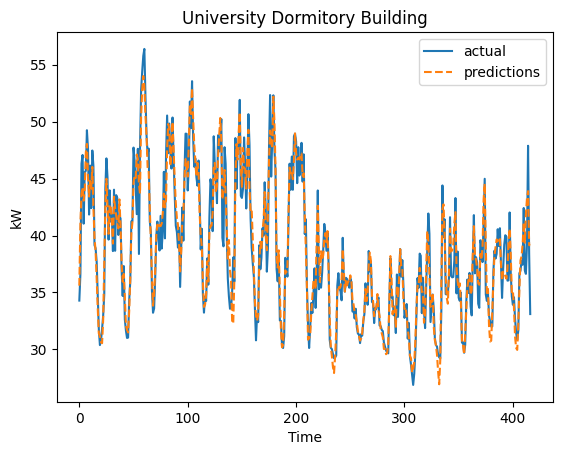

In [12]:

plt.plot(proposed_method_univdorm[4],label="actual")
plt.plot(proposed_method_univdorm[3],label="predictions",linestyle='dashed')
plt.title('University Dormitory Building')

plt.legend()
plt.xlabel('Time')
plt.ylabel('kW')

Text(0, 0.5, 'kW')

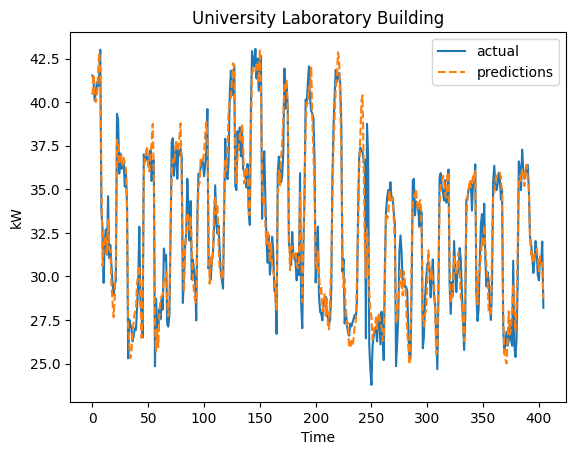

In [13]:
plt.plot(proposed_method_univlab[4],label="actual")
plt.plot(proposed_method_univlab[3],label="predictions",linestyle='dashed')
plt.title('University Laboratory Building')

plt.legend()
plt.xlabel('Time')
plt.ylabel('kW')

Text(0, 0.5, 'kW')

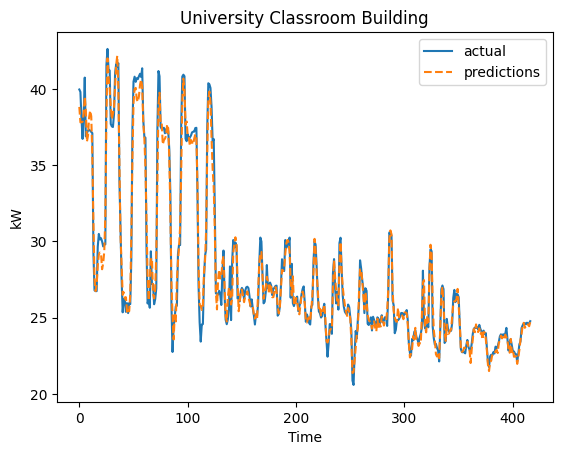

In [14]:
plt.plot(proposed_method_univclass[4],label="actual")
plt.plot(proposed_method_univclass[3],label="predictions",linestyle='dashed')
plt.title('University Classroom Building')

plt.legend()
plt.xlabel('Time')
plt.ylabel('kW')

Text(0, 0.5, 'kW')

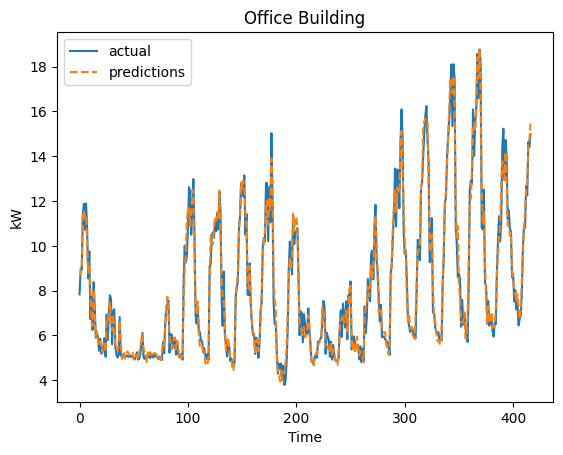

In [15]:
plt.plot(proposed_method_office[4],label="actual")
plt.plot(proposed_method_office[3],label="predictions",linestyle='dashed')
plt.title('Office Building')

plt.legend()
plt.xlabel('Time')
plt.ylabel('kW')

Text(0, 0.5, 'kW')

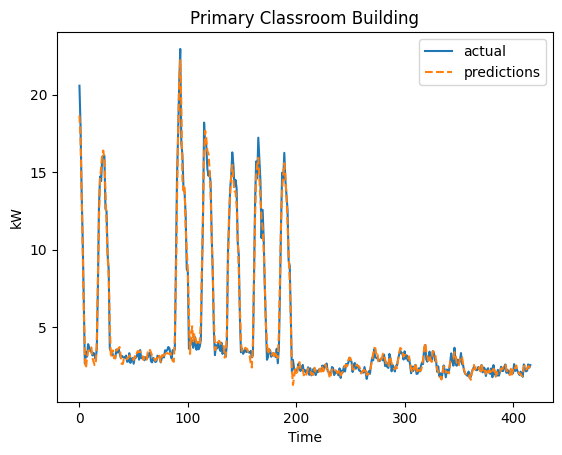

In [16]:
plt.plot(proposed_method_primclass[4],label="actual")
plt.plot(proposed_method_primclass[3],label="predictions",linestyle='dashed')
plt.title('Primary Classroom Building')

plt.legend()
plt.xlabel('Time')
plt.ylabel('kW')